In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random, math
from sklearn import metrics, preprocessing

In [2]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]

In [3]:
for x in X:
    print(x, X[x].mean(), X[x].std())

0 0.49470407977930503 1.3449865594376695
1 0.516274522473487 1.5177195970233683
2 0.5095343858985382 1.94489237188383
3 0.4966528421438804 0.3048163629268642
4 0.49853175080252277 0.28810288065896505
5 0.5110811887130975 2.168340375826461
6 0.4895815776841513 1.7458686837746946
7 0.5178436910346803 2.061409688156997
8 0.5013786180223544 0.45596019601482124
9 3.0182967773946645 1.8528940320573326
10 0.11868357558039563 0.25355872560278697
11 -0.003736442877615337 0.10767714752893678
12 0.5158722637632556 1.684370352137154
13 0.5105970083920888 2.98558571455822
14 25.054534093442317 55.319859243086114
15 0.4993096156606479 0.6223232214381319
16 0.4951357647520798 0.35041105005230644
17 0.36235239490398374 26.802750983153846
18 0.48748855520492806 1.8596522030452292
19 0.5007497757408992 1.2653599730897351
20 0.49630783340785384 0.3130275023209892
21 0.4799285076239612 0.349111822853086
22 0.4718951648781882 2.0233343597036337
23 0.48745274146460277 1.5118179150973727
24 2.992473836970477

In [4]:
corr = X.corr()
for i in corr:
    for j in corr:
        if ((corr[i][j] > 0.94) and (i!=j) and (i<j)):
            print(corr[i][j], i, j, X[i].min(), X[i].max(), X[i].std(), X[j].min(), X[j].max(), X[j].std())

0.962376665754 0 6 -2.21809278 4.74440233 1.3449865594376695 -3.11277137 6.00301064 1.7458686837746946
0.96282840392 0 26 -2.21809278 4.74440233 1.3449865594376695 -4.24842558 6.71234825 2.024465960660953
0.961116124832 0 30 -2.21809278 4.74440233 1.3449865594376695 -3.97419073 6.58420081 1.973007056544601
0.953767889509 0 70 -2.21809278 4.74440233 1.3449865594376695 -2.00806145 4.74919187 1.3032449506598176
0.950690003491 0 135 -2.21809278 4.74440233 1.3449865594376695 -3.42512104 5.33783517 1.457106692156526
0.976232250273 0 138 -2.21809278 4.74440233 1.3449865594376695 -2.08918947 3.10904892 0.9958909398762206
0.949179402552 0 183 -2.21809278 4.74440233 1.3449865594376695 -3.1170278 5.19353249 1.4495120562853117
0.959507644328 0 193 -2.21809278 4.74440233 1.3449865594376695 -3.65991142 6.94983259 2.003864558964135
0.965325843052 0 208 -2.21809278 4.74440233 1.3449865594376695 -3.89270731 6.75958844 2.0073883410668176
0.967204796408 1 2 -3.04984144 6.22351161 1.5177195970233683 -3.64

In [48]:
arr = [
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191]
]
corr = X.corr()
for i in corr:
    for j in corr:
        if ((corr[i][j] > 0.92) and (i!=j) and (i<j)):
            added = False
            for l, k in enumerate(arr):
                if not added:
                    if len(k) < 12:
                        if (i in k):
                            if j not in k:
                                k.append(j)
                            added = True
                        if (j in k):
                            if i not in k:
                                k.append(i)
                            added = True
            if not added:
                arr.append([i, j])
arr

[[0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
 [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
 [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
 [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
 [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
 [81, 185, 215, 89, 188, 213, 101, 130, 22, 112, 71, 191],
 [0, 6, 26, 30, 51, 70, 135, 138, 183, 193, 208, 157],
 [1, 2, 7, 46, 94, 117, 118, 167, 199, 200, 216, 218],
 [12, 141, 174, 13, 185, 215, 41, 184, 79, 81, 89, 108],
 [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179],
 [19, 186],
 [22, 98, 112],
 [26, 183, 193, 208, 30, 51, 70, 135, 138, 157],
 [28, 57, 104, 43, 58, 107, 144, 190, 76, 125, 128, 155],
 [30, 51, 70, 135, 138, 157, 120, 61],
 [32, 66, 90, 201, 105, 216, 219, 117, 118, 167, 199, 200],
 [33, 77, 84, 113, 127, 131, 146, 154, 177, 36, 163, 92],
 [34, 44, 45, 64, 97, 116, 169, 204, 210, 187, 99, 220],
 [35, 76, 102, 58, 87, 190, 195, 218, 104, 107, 125, 128],
 [41, 150, 174, 184],
 [47, 49

In [38]:
corrs = [
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191],
    [32, 66, 90, 201, 85, 99, 176, 220, [144, 41, 150, 36, 163, 43, 57]]
    
    
]

In [49]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,...,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,0.494704,0.516275,0.509534,0.496653,0.498532,0.511081,0.489582,0.517844,0.501379,3.018297,...,0.506315,0.488314,0.508792,0.516152,0.491506,0.520646,0.513619,0.491074,0.487143,0.494403
std,1.344987,1.517720,1.944892,0.304816,0.288103,2.168340,1.745869,2.061410,0.455960,1.852894,...,1.823615,2.066324,2.231573,1.893010,0.663052,2.859162,1.640211,2.798898,0.759490,0.504922
min,-2.218093,-3.049841,-3.644502,-0.103472,0.000202,-6.311034,-3.112771,-3.924850,-0.567797,-1.517063,...,-4.907867,-5.978127,-6.095323,-3.873535,-1.449840,-5.190807,-4.348962,-6.242872,-1.650250,-0.805370
25%,-0.589310,-0.527882,-0.794563,0.237865,0.256838,-1.053578,-0.971074,-0.899595,0.181897,1.547495,...,-0.838412,-1.013490,-1.243487,-0.799890,0.035183,-1.551566,-0.692253,-1.507348,-0.081461,0.125037
50%,0.280815,0.596674,0.590149,0.497017,0.499785,0.473108,0.188150,0.578649,0.473828,2.731865,...,0.313560,0.275163,0.153479,0.545157,0.458264,0.357019,0.398614,0.095635,0.486496,0.457783
75%,1.416563,1.605525,1.862141,0.748879,0.749846,2.052051,1.711705,1.955837,0.778593,4.174919,...,1.785158,1.845097,2.052449,1.817626,0.903188,2.460358,1.660167,2.295469,1.039252,0.821512
max,4.744402,6.223512,8.318870,2.032806,0.999830,10.749737,6.003011,9.384850,3.594312,10.741713,...,6.356287,8.144853,8.391595,8.026214,3.419200,16.147908,8.265469,15.120344,3.239605,2.108298


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  9.]),
 array([-0.00501181,  0.04537106,  0.09575393,  0.1461368 ,  0.19651968,
         0.24690255,  0.29728542,  0.34766829,  0.39805116,  0.44843404,
         0.49881691]),
 <a list of 10 Patch objects>)

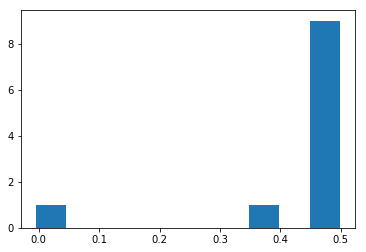

In [35]:
corrs = [
    [0, 6, 26, 30, 70, 135, 138, 193, 208, 183, 51, 120],
    [1, 2, 7, 118, 200, 216, 117, 46, 94, 218, 167, 199],
    [17, 18, 27, 59, 72, 79, 108, 114, 168, 171, 179, 184],
    [35, 76, 58, 104, 87, 102, 107, 128, 144, 155, 190, 218],
    [77, 84, 127, 131, 146, 148, 154, 47, 49, 209, 212, 33],
    [81, 185, 215, 89, 188, 213, 101, 130,22, 112, 71, 191]
]

In [32]:
stds[0]

TypeError: 'map' object is not subscriptable

In [60]:
corr_11 = []
for i, c in enumerate(corr[193]):
    if c > 0.8:
        corr_11.append([i, c])
corr_11

[[0, 0.95950764432849778],
 [6, 0.96878110312022525],
 [23, 0.90220278746466964],
 [26, 0.97121233680079666],
 [30, 0.96872990723192165],
 [51, 0.94207668181458459],
 [54, 0.87059227725002275],
 [61, 0.90272376245767105],
 [62, 0.82266269875429865],
 [70, 0.95798959732559219],
 [120, 0.87959338266663256],
 [135, 0.96012129966122228],
 [138, 0.9804001267027328],
 [157, 0.92690657640604268],
 [158, 0.84477341655245253],
 [183, 0.95882879138341448],
 [193, 1.0],
 [198, 0.87521970751099454],
 [208, 0.9726093577979773],
 [214, 0.81337772315632817]]